In [1]:
#Importing all the libraries that this project needed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

In [2]:
#Loading the dataset.

df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#Concise Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#Summary

df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
#Checking for null values.

df.isnull().sum().sum()

0

Our DataFrame contain **Zero** Null values.
<br><br>
Now lets solve the problem with **Purpose** Attribute.

In [6]:
#Unique values in purpose attribute

df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

It has **unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(5).

In [7]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Data Visualization

Text(0.5, 0, 'FICO')

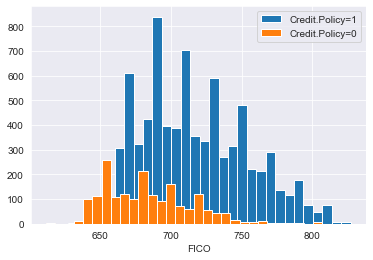

In [8]:
#Plotting the histogram

sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

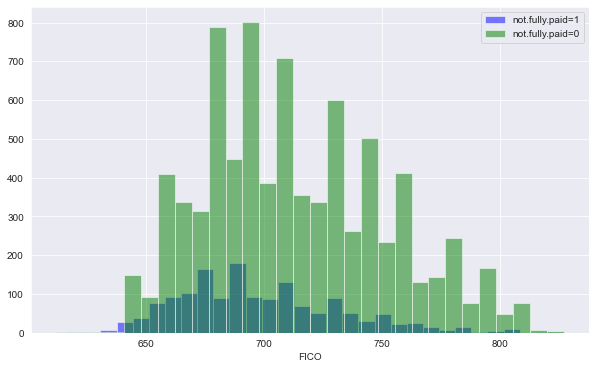

In [9]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

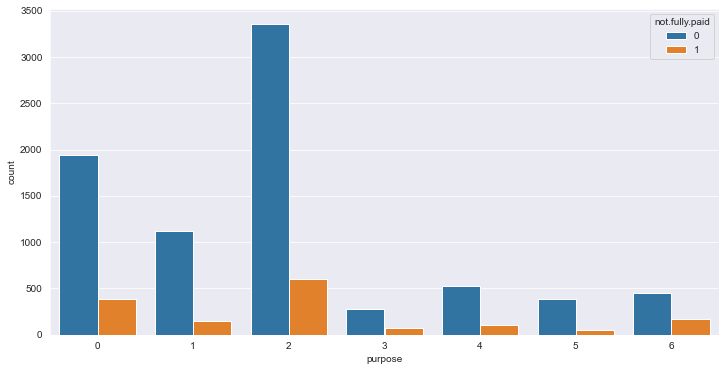

In [10]:
#Creating a countplot to see the counts of purpose of loans by not.fully.paid.

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

<Figure size 720x432 with 0 Axes>

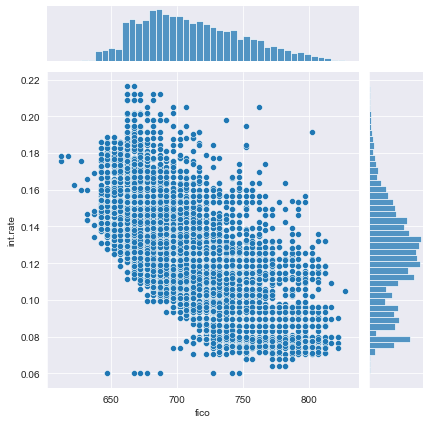

In [11]:
#Checking the trend between FICO and the interest rate.

plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

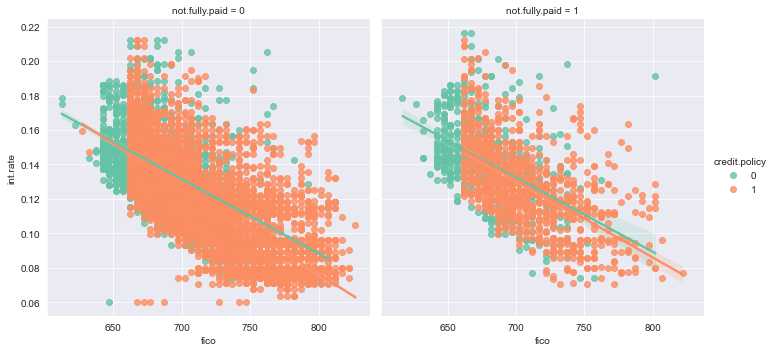

In [12]:
#Understanding the relationship between credit.policy and not.fully.paid.

sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

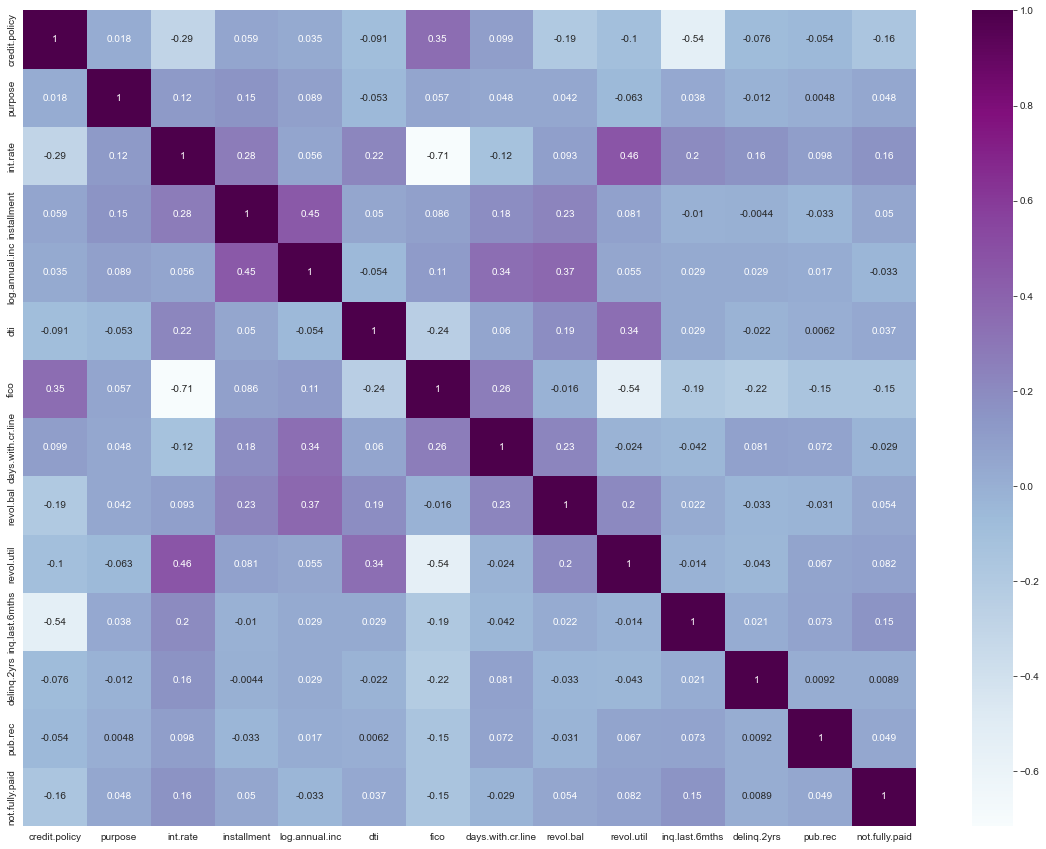

In [13]:
#Plotting the heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.gully.paid)



### Train-Test Split

Splitting the dataset for training and testing purpose.

In [14]:
#Dropping target class.

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [15]:
#Splitting the dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Modeling

## KNN 

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [17]:
X_train.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
4845,1,2,0.1426,548.90,10.714418,14.67,682,3959.958333,9092,23.2,0,0,0
6910,1,0,0.0774,312.19,10.819778,0.86,772,5190.041667,2232,6.5,0,0,0
8146,0,2,0.1520,208.59,10.491274,18.53,642,3270.000000,6970,76.6,4,1,0
7113,1,0,0.1385,511.56,10.950807,12.74,682,3420.041667,21113,72.6,2,0,0
195,1,1,0.1059,130.18,11.034890,17.81,682,6330.041667,18168,68.5,2,0,0
1531,1,1,0.1083,78.38,10.596635,15.75,697,5160.041667,13620,29.9,2,0,0
7922,0,1,0.1438,359.95,11.245046,9.98,642,4679.958333,15918,101.4,6,0,0
583,1,2,0.0976,771.72,11.918391,0.22,782,4319.041667,4643,5.8,3,0,0
4024,1,2,0.1632,529.71,11.608236,10.37,662,3360.000000,14517,91.3,2,0,1
9522,0,1,0.1533,362.22,11.127263,24.78,682,3710.000000,46338,55.5,5,0,0


In [18]:
#Feature selection

sc_X = StandardScaler()
X_train1 = sc_X.fit_transform(X_train)
X_test1 = sc_X.fit_transform(X_test)

In [19]:
import math
math.sqrt(len(y_test))

53.60970061472084

In [20]:
#Generally for optimal number of K we use k = sqrt(n), here k = 53

In [21]:
#Initializing K-NN.

classifier = KNeighborsClassifier(n_neighbors=53, p=2, metric='euclidean')

In [22]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=53)

In [23]:
#Predicting the test set results.

y_pred = classifier.predict(X_test)
y_pred[:6]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
#Evaluate the model

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2431    0]
 [ 443    0]]


In [25]:
print(accuracy_score(y_test, y_pred))

0.8458594293667363


In [26]:
print(f1_score(y_test, y_pred))

0.0


2874


(array([2431.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         443.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

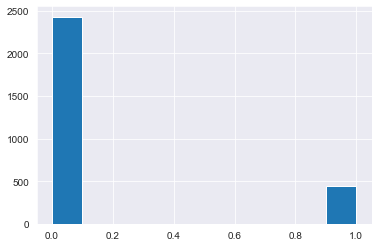

In [27]:
print(len(y_test))
plt.hist(y_test)

In [28]:
#Accuracy of the KNN classifier is 84.6% but the F1 score is 0. Which means that KNN algorithm is unable to tell which of the 
#customers are delinquent(not.fully.paid) so we try other algorithms.

In [29]:
#Lets try grid search, we will tune parameters for k value, 


#Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1,54)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

#Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

#Fit the model to the data
grid_search.fit(X_train, y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Get the best model
best_knn_model = grid_search.best_estimator_

#Evaluate the best model on the test set
accuracy = best_knn_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
Accuracy on Test Set: 0.8458594293667363


Text(0.5, 1.0, 'Confusion Matrix')

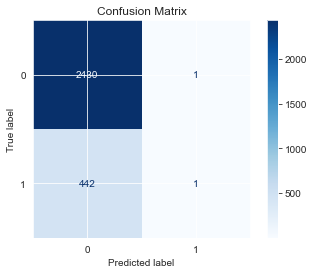

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#Plot the confusion matrix
disp = plot_confusion_matrix(best_knn_model, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title('Confusion Matrix')

In [31]:
#Even after taking the k values from 0 to sqrt(n) we get F1 score almost 0 for best model. One reason can be that not.fully.paid column
#has high values of 0's compared to 1's. So lets take small value of K and try the KNN classifier

In [32]:
# Lets try grid search, we will tune parameters for k value, 


# Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1,5)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_knn_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Accuracy on Test Set: 0.8340292275574113


Text(0.5, 1.0, 'Confusion Matrix')

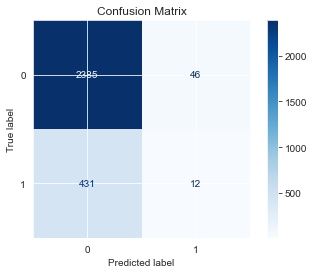

In [33]:
#Get confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix
disp = plot_confusion_matrix(best_knn_model, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title('Confusion Matrix')

In [34]:
# There is improvement in the correct classification of 1s but it is very low. So lets dive into decision trees.

In [35]:
y_test_pred = best_knn_model.predict(X_test)
print("Accuracy of KNN: ", accuracy_score(y_test, y_test_pred))
print("Precision of KNN: ", precision_score(y_test, y_test_pred))
print("Recall of KNN:", recall_score(y_test, y_test_pred))
print("F1 score of KNN:", f1_score(y_test, y_test_pred))

Accuracy of KNN:  0.8340292275574113
Precision of KNN:  0.20689655172413793
Recall of KNN: 0.02708803611738149
F1 score of KNN: 0.04790419161676646


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Predict on the test data
predictions = dtree.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print("\n<----------Classification Report---------->")
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, predictions)
print("precision:", precision)
# Calculate recall
recall = recall_score(y_test, predictions)
print("recall:", recall)
# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1:", f1)

[[1977  454]
 [ 337  106]]

<----------Classification Report---------->
accuracy: 0.7247738343771747
precision: 0.18928571428571428
recall: 0.23927765237020315
F1: 0.2113659022931206


In [37]:
# Lets try ensemble with decision tree

### **Bagging** with Decision Tree

In [38]:
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': list(range(3,20))}
#[2,3,4,5,6,7,8,9,10,11,13,15,20]

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'max_depth': 4}

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X, y are defined
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create BaggingClassifier with DecisionTreeClassifier as the base estimator
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=100, bootstrap=True)

# Fit the model
bag_dt.fit(X_train, y_train)

# Get predicted y values
y_pred = bag_dt.predict(X_test)

# Print or use y_pred as needed
print(y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy:  0.8418580375782881
Precision:  1.0
Recall: 0.006557377049180328
F1 score: 0.013029315960912053


### **AdaBoosting** with Decision Tree

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Applying AdaBoost to the Decision Tree Classifier
ada_boost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=101)

# Fit the model to the training data
ada_boost_clf.fit(X_train, y_train)

# Predict on the test data
ada_predictions = ada_boost_clf.predict(X_test)

# Calculate accuracy, precision, and recall
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_classification_report = classification_report(y_test, ada_predictions)
print('Train score: {0:0.2f}'.format(ada_boost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(ada_boost_clf.score(X_test, y_test)))

y_pred = ada_boost_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, ada_predictions)
print(conf_matrix)

print("ada_accuracy:", ada_accuracy)
print(ada_classification_report)




Train score: 1.00
Test score: 0.75
[[1355  256]
 [ 224   81]]
ada_accuracy: 0.7494780793319415
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1611
           1       0.24      0.27      0.25       305

    accuracy                           0.75      1916
   macro avg       0.55      0.55      0.55      1916
weighted avg       0.76      0.75      0.75      1916



In [41]:
y_pred = ada_boost_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

[[1355  256]
 [ 224   81]]
Accuracy:  0.7494780793319415
Precision:  0.2403560830860534
Recall: 0.26557377049180325
F1 score: 0.2523364485981308


## Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict on the test data
rfc_predictions = rfc.predict(X_test)

In [43]:
print("Accuracy: ", accuracy_score(y_test, rfc_predictions))
print("Precision: ", precision_score(y_test, rfc_predictions))
print("Recall:", recall_score(y_test, rfc_predictions))
print("F1 score:", f1_score(y_test, rfc_predictions))

Accuracy:  0.8397703549060542
Precision:  0.45
Recall: 0.029508196721311476
F1 score: 0.055384615384615386


### AdaBoosting with RandomForest

In [44]:
#Applying AdaBoost to RFC to check whether there is any improvement in the model

from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rfc, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))
y_pred_train = adaboost_clf.predict(X_train)
y_pred_test = adaboost_clf.predict(X_test)

# Calculate accuracy, precision, and recall
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

Train score: 1.00
Test score: 0.84


In [45]:
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 score:", f1_score(y_test, y_pred_test))

Accuracy:  0.8387265135699373
Precision:  0.375
Recall: 0.019672131147540985
F1 score: 0.03738317757009346


### Gradient Boosting

In [46]:
#Initializing Gradient Boosting to see there is any better performming model

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

Train score: 0.85
Test score: 0.84


In [47]:
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 score:", f1_score(y_test, y_pred_test))

Accuracy:  0.8397703549060542
Precision:  0.4166666666666667
Recall: 0.01639344262295082
F1 score: 0.031545741324921134
